## Import Libararies

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pylab as plt
import graphviz

## 1. Load the data

In [2]:
#insert the code to load the data for processing.
credit_df = pd.read_csv("./Data/german-credit-card.csv")

## 2. Show data information

In [3]:
#look at the first five rows of the data
credit_df.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
credit_df.target_names= ['Good', 'Bad']
print(credit_df.target_names)

['Good', 'Bad']


C:\Users\MEGHA\AppData\Local\Temp\ipykernel_20552\4108283229.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  credit_df.target_names= ['Good', 'Bad']


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   saving_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

## 3. Data preprocessing

### (i) Remove target from model training

Feature 'status' is what the model needs to predict. Remove it  to create the feature array to train the model

In [6]:
X_features = list(credit_df.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'purpose',
 'amount',
 'saving_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'other_debtors',
 'residing_since',
 'property',
 'age',
 'inst_plans',
 'housing',
 'num_credits',
 'job',
 'dependents',
 'telephone',
 'foreign_worker']

### (ii) Create dummy variables for categorical values.

In [7]:
# insert the code to create dummy variable for categorical features.
credit_df_complete = pd.get_dummies(credit_df[X_features], drop_first = True)

In [8]:
credit_df_complete.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,1,0,1,0,1,0,1,0,0,0


In [9]:
len(credit_df_complete.columns) #print the number of columns

48

### (iii)Convert the credit rating (1 = Good, 2 = Bad) to value 0 or 1 for binary prediction labels

In [10]:
#Change the reponse variable to 0 = Good and 1 = Bad
Y = credit_df.status - 1
X = credit_df_complete

## 4. Standardize the data

In [11]:
#Insert the code to standardize the data.
scaler = MinMaxScaler()
#Fit the scaler to your data and transform the data
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [12]:
X_scaled.columns = X.columns

In [13]:
X_scaled.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## 5. Feature Selection using correlation matrix

In [14]:
X_copy = X_scaled.copy(deep=True)
X_copy["Status"] = Y
correlation_matrix = X_copy.corr()
correlation_matrix = correlation_matrix['Status']
correlation_matrix

duration                 0.214927
amount                   0.154739
inst_rate                0.072404
residing_since           0.002967
age                     -0.091127
num_credits             -0.045732
dependents              -0.003015
checkin_acc_A12          0.119581
checkin_acc_A13         -0.044009
checkin_acc_A14         -0.322436
credit_history_A31       0.134448
credit_history_A32       0.043722
credit_history_A33       0.012325
credit_history_A34      -0.181713
purpose_A41             -0.099791
purpose_A410             0.028058
purpose_A42              0.020971
purpose_A43             -0.106922
purpose_A44              0.008016
purpose_A45              0.020828
purpose_A46              0.070088
purpose_A48             -0.039281
purpose_A49              0.036129
saving_acc_A62           0.022255
saving_acc_A63          -0.070954
saving_acc_A64          -0.085749
saving_acc_A65          -0.129238
present_emp_since_A72    0.106397
present_emp_since_A73    0.010603
present_emp_si

Examining the values, the least contributing attributes to the target prediction are with extremely low correlation coefficient values. After data examination, the threshold we set is 0.1

In [15]:
features = correlation_matrix[abs(correlation_matrix) > 0.1]
features = features.drop('Status')
features

duration                 0.214927
amount                   0.154739
checkin_acc_A12          0.119581
checkin_acc_A14         -0.322436
credit_history_A31       0.134448
credit_history_A34      -0.181713
purpose_A43             -0.106922
saving_acc_A65          -0.129238
present_emp_since_A72    0.106397
property_A124            0.125750
inst_plans_A143         -0.113285
housing_A152            -0.134589
Name: Status, dtype: float64

In [16]:
X_scaled = X_scaled[features.index.tolist()]
X_scaled.head()

,duration,amount,checkin_acc_A12,checkin_acc_A14,credit_history_A31,credit_history_A34,purpose_A43,saving_acc_A65,present_emp_since_A72,property_A124,inst_plans_A143,housing_A152
0,0.029412,0.050567,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1,0.647059,0.313690,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.117647,0.101574,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.558824,0.419941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.294118,0.254209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## 6. Split the data for training and testing

In [17]:
# Insert the code to split the data for training and testing set.
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## 7. Build Machine learning models

### (i) Decision Tree - Best Accuracy Obtained : 76.5%

Tried with non scaled version of the dataset and it performed better. Hence, decision tree approach here uses non standardized data to test and train.

In [19]:
my_decision_tree = DecisionTreeClassifier(max_depth=6,random_state=42, criterion="gini") # criterion can be "gini" or "entropy". You can experiment with both.
my_decision_tree.fit(X_train,y_train)
print('acc for training data: {:.3f}'.format(my_decision_tree.score(X_train,y_train)))
print('acc for test data: {:.3f}'.format(my_decision_tree.score(X_test,y_test)))

acc for training data: 0.828
acc for test data: 0.765


In [20]:
#Important Features in the decision tree classifier
print('Feature importances: {}'.format(my_decision_tree.feature_importances_)) 

Feature importances: [0.11077826 0.19645884 0.         0.01632269 0.07177247 0.
 0.00989254 0.         0.0218304  0.199945   0.02928735 0.0108818
 0.         0.0108818  0.02385813 0.         0.0115977  0.0850955
 0.         0.00642626 0.01056357 0.01175234 0.         0.00668736
 0.01228088 0.         0.0288902  0.         0.0108818  0.0108818
 0.         0.         0.00870544 0.         0.00949684 0.
 0.         0.03881174 0.         0.         0.03262633 0.
 0.         0.         0.         0.01339298 0.         0.        ]


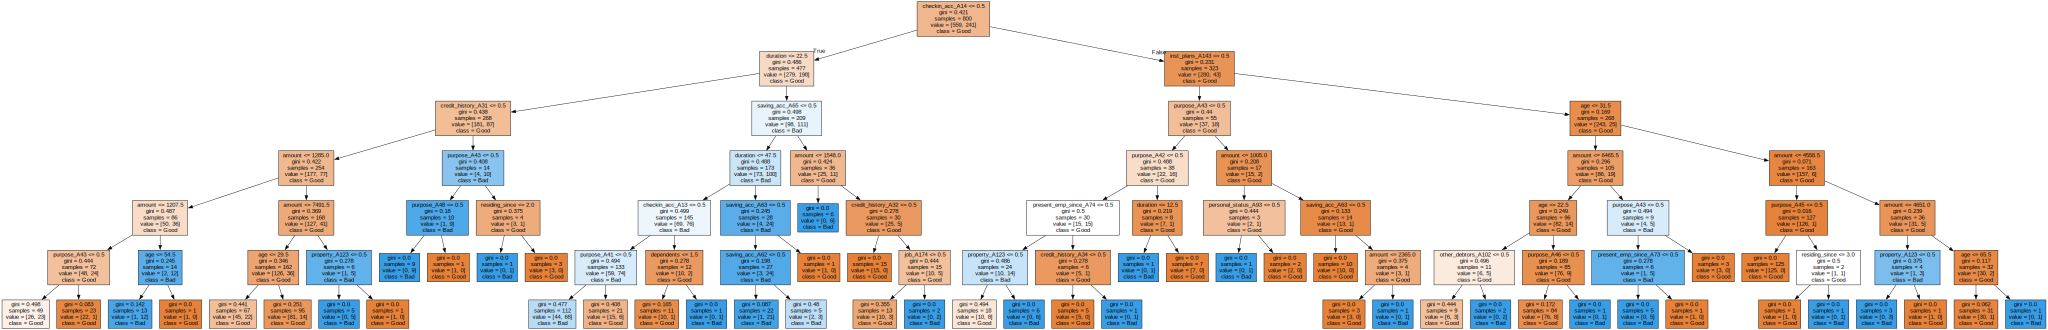

In [21]:
# DOT data
dot_data = tree.export_graphviz(my_decision_tree, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=credit_df.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")
graph

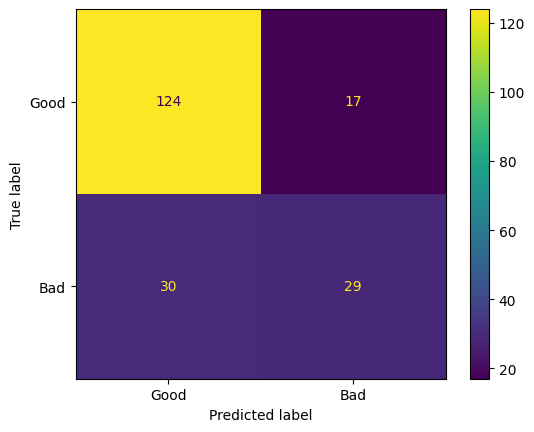

In [22]:
y_pred_dt = my_decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt, labels=my_decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=credit_df.target_names)
disp.plot()
plt.show()

In [23]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       141
           1       0.63      0.49      0.55        59

    accuracy                           0.77       200
   macro avg       0.72      0.69      0.70       200
weighted avg       0.75      0.77      0.76       200



### (ii) Logistic Regression - Best Accuracy Obtained : 76.0%

We add a solver term for regularization and C is the inverse of regularization strength

In [25]:
#regularization added
model = LogisticRegression(solver='liblinear', C=10.0, random_state=42)
model.fit(X_train_scaled, y_train)
# Print the accuracy score on the training set
print('Accuracy on the training set: {:.4f}'.format(model.score(X_train_scaled, y_train)))
# Print the accuracy score on the testing set
print('Accuracy on the testing set: {:.3f}'.format(model.score(X_test_scaled, y_test)))

Accuracy on the training set: 0.7362
Accuracy on the testing set: 0.760


In [26]:
# Print out the logistic coefficients
print('Coefficients: \n', log_reg.coef_)

Coefficients: 
 [[ 1.596304    0.66738995 -0.21831453 -1.37189263  0.41052074 -0.73826081
  -0.47834527 -0.52988507  0.34211431  0.10281907 -0.48016343 -0.44549905]]


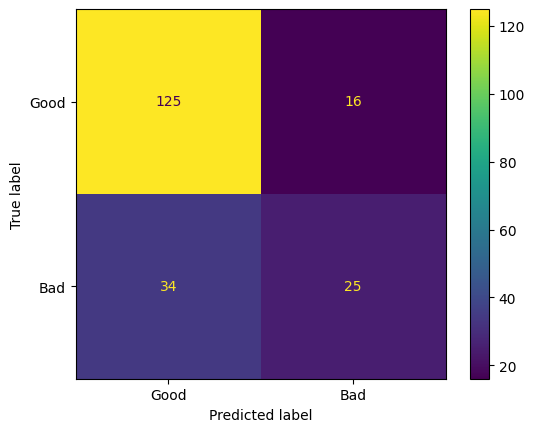

In [27]:
y_pred_lc = log_reg.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_lc, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=credit_df.target_names)
disp.plot()
plt.show()

In [28]:
print(classification_report(y_test, y_pred_lc))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       141
           1       0.61      0.42      0.50        59

    accuracy                           0.75       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.73      0.75      0.73       200



### (iii) MLP Classifier Neural Network - Best Accuracy Obtained : 78.0%

I change the activation function into tanh and set random state to None. 

In [55]:
##MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam', random_state=None)
#clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam', random_state=None, early_stopping=True, validation_fraction=0.2, n_iter_no_change=10, learning_rate='adaptive')

clf.fit(X_train_scaled, y_train)
# Print the accuracy score on the training set
print('Accuracy on the training set: {:.4f}'.format(clf.score(X_train_scaled, y_train)))
# Print the accuracy score on the testing set

print('Accuracy on the testing set: {:.3f}'.format(clf.score(X_test_scaled, y_test)))

Accuracy on the training set: 0.7725
Accuracy on the testing set: 0.775


C:\Users\MEGHA\anaconda3\envs\deeplearn\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


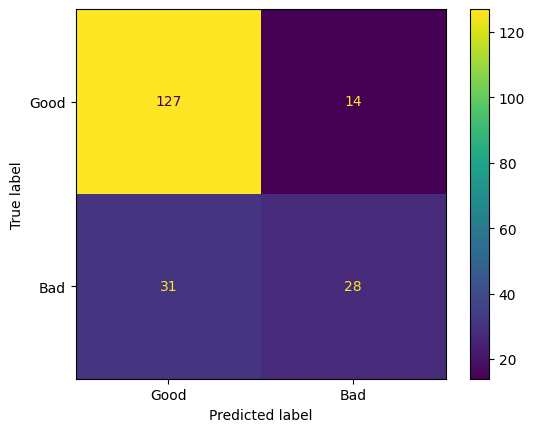

In [56]:
y_pred_mlp = clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_mlp, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=credit_df.target_names)
disp.plot()
plt.show()

In [57]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       141
           1       0.67      0.47      0.55        59

    accuracy                           0.78       200
   macro avg       0.74      0.69      0.70       200
weighted avg       0.76      0.78      0.76       200



## Test Accuracy Comparison

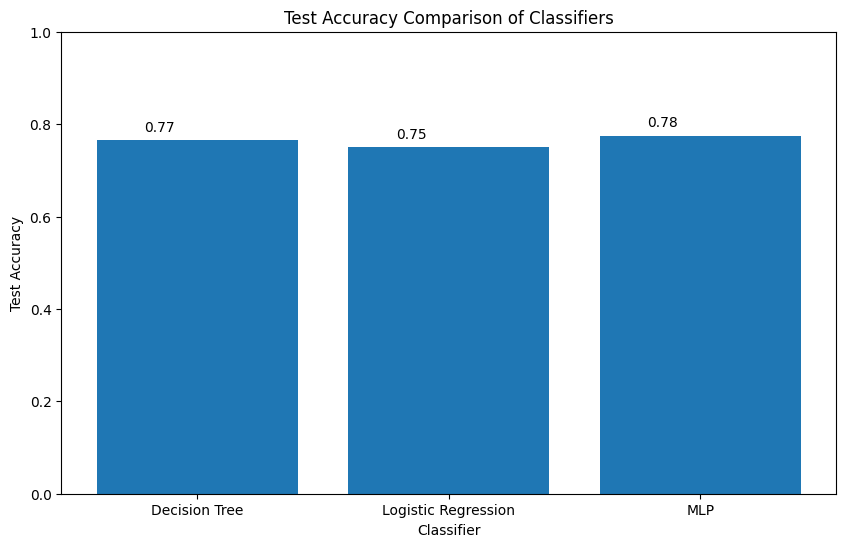

In [58]:
classifiers = [my_decision_tree, log_reg, clf]
classifier_names = ['Decision Tree','Logistic Regression', 'MLP']
accuracies = [my_decision_tree.score(X_test,y_test),log_reg.score(X_test_scaled,y_test),clf.score(X_test_scaled,y_test)]

# Create a bar chart to compare test accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(classifier_names, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison of Classifiers')
plt.ylim(0,1)

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.02, f'{accuracy:.2f}', ha='center')

plt.show()

### The model with the highest accuracy is MLP Classifier Neural Networks with a test accuracy of 78%.